In [39]:
import pandas as pd
import numpy as np

In [40]:
gspc = pd.read_csv('GSPC.csv', index_col='Date', parse_dates=True).resample('M').last().loc[:'2021-01']
vfinx = pd.read_csv('VFINX.csv', index_col='Date', parse_dates=True).resample('M').last().loc[:'2021-01']

ff = pd.read_csv(

    'F-F_Research_Data_Factors.csv',

    index_col=0,

    skiprows=3,

    nrows=12*(2020 - 1927 + 1) + 6 + 1

)

ff.index = pd.to_datetime(ff.index, format='%Y%m') + pd.offsets.MonthEnd(0)

In [41]:
ff.head()

,Mkt-RF,SMB,HML,RF
1926-07-31,2.96,-2.30,-2.87,0.22
1926-08-31,2.64,-1.40,4.19,0.25
1926-09-30,0.36,-1.32,0.01,0.23
1926-10-31,-3.24,0.04,0.51,0.32
1926-11-30,2.53,-0.20,-0.35,0.31


In [42]:
gspc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-31,0.0,117.17,113.78,114.16,114.16,65900000
1980-02-29,0.0,114.12,111.77,113.66,113.66,38810000
1980-03-31,0.0,102.65,100.02,102.09,102.09,35840000
1980-04-30,0.0,106.72,104.50,106.29,106.29,30850000
1980-05-31,0.0,111.55,108.87,111.24,111.24,34820000


In [43]:
df = gspc.join(ff, how='inner')

In [44]:
df = df[['Adj Close', 'RF']]

In [45]:
df

,Adj Close,RF
1980-01-31,114.16,0.80
1980-02-29,113.66,0.89
1980-03-31,102.09,1.21
1980-04-30,106.29,1.26
1980-05-31,111.24,0.81
...,...,...
2020-09-30,3363.00,0.01
2020-10-31,3269.96,0.01
2020-11-30,3621.63,0.01
2020-12-31,3756.07,0.01


In [46]:
df['return'] = df['Adj Close']/df['Adj Close'].shift(1) - 1

In [47]:
df.loc[(df['return'] > 0) & (df['return'].shift(1) > 0), 'pos'] = 1
df.loc[(df['return'] < 0) & (df['return'].shift(1) < 0), 'pos'] = 0

In [48]:
df

,Adj Close,RF,return,pos
1980-01-31,114.16,0.80,NaN,NaN
1980-02-29,113.66,0.89,-0.004380,NaN
1980-03-31,102.09,1.21,-0.101795,0.0
1980-04-30,106.29,1.26,0.041140,NaN
1980-05-31,111.24,0.81,0.046571,1.0
...,...,...,...,...
2020-09-30,3363.00,0.01,-0.039228,NaN
2020-10-31,3269.96,0.01,-0.027666,0.0
2020-11-30,3621.63,0.01,0.107546,NaN
2020-12-31,3756.07,0.01,0.037121,1.0


In [49]:
df.iloc[0,3] = 1
df['pos'] = df['pos'].fillna(method='ffill')
df

,Adj Close,RF,return,pos
1980-01-31,114.16,0.80,NaN,1.0
1980-02-29,113.66,0.89,-0.004380,1.0
1980-03-31,102.09,1.21,-0.101795,0.0
1980-04-30,106.29,1.26,0.041140,0.0
1980-05-31,111.24,0.81,0.046571,1.0
...,...,...,...,...
2020-09-30,3363.00,0.01,-0.039228,1.0
2020-10-31,3269.96,0.01,-0.027666,0.0
2020-11-30,3621.63,0.01,0.107546,0.0
2020-12-31,3756.07,0.01,0.037121,1.0


In [50]:
df['pos'] = df['pos'].shift(1)
df

,Adj Close,RF,return,pos
1980-01-31,114.16,0.80,NaN,NaN
1980-02-29,113.66,0.89,-0.004380,1.0
1980-03-31,102.09,1.21,-0.101795,1.0
1980-04-30,106.29,1.26,0.041140,0.0
1980-05-31,111.24,0.81,0.046571,0.0
...,...,...,...,...
2020-09-30,3363.00,0.01,-0.039228,1.0
2020-10-31,3269.96,0.01,-0.027666,1.0
2020-11-30,3621.63,0.01,0.107546,0.0
2020-12-31,3756.07,0.01,0.037121,0.0


In [51]:
df1 = vfinx.join(ff, how='inner')

In [52]:
df1 = df1[['Adj Close','RF']]

In [53]:
df1

,Adj Close,RF
1980-01-31,5.550337,0.80
1980-02-29,5.571810,0.89
1980-03-31,5.026296,1.21
1980-04-30,5.243568,1.26
1980-05-31,5.533269,0.81
...,...,...
2020-09-30,309.145447,0.01
2020-10-31,300.887115,0.01
2020-11-30,333.791046,0.01
2020-12-31,346.600006,0.01


In [54]:
df1['pos'] = df['pos']
df1['RF'] = df1['RF']/100

In [55]:
df1.iloc[0,2] = 1

In [56]:
df1['return'] = df1['Adj Close']/df1['Adj Close'].shift(1) - 1

In [57]:
df1['Naive'] = np.nan

In [58]:
df1['investment'] = 500
iloc_naive = df1.columns.get_loc('Naive')
iloc_Return = df1.columns.get_loc('return')
iloc_Invest = df1.columns.get_loc('investment')
iloc_RF = df1.columns.get_loc('RF')

In [59]:
df1

,Adj Close,RF,pos,return,Naive,investment
1980-01-31,5.550337,0.0080,1.0,NaN,NaN,500
1980-02-29,5.571810,0.0089,1.0,0.003869,NaN,500
1980-03-31,5.026296,0.0121,1.0,-0.097906,NaN,500
1980-04-30,5.243568,0.0126,0.0,0.043227,NaN,500
1980-05-31,5.533269,0.0081,0.0,0.055249,NaN,500
...,...,...,...,...,...,...
2020-09-30,309.145447,0.0001,1.0,-0.040059,NaN,500
2020-10-31,300.887115,0.0001,1.0,-0.026713,NaN,500
2020-11-30,333.791046,0.0001,0.0,0.109356,NaN,500
2020-12-31,346.600006,0.0001,0.0,0.038374,NaN,500


In [60]:
df1.iloc[0,iloc_naive] = 500
for i in range(1, len(df1)):
    df1.iloc[i, iloc_naive] = (df1.iloc[i-1, iloc_naive] + df1.iloc[i, iloc_Invest])*(1 + df1.iloc[i, iloc_Return])

In [61]:
df1.round(2)

,Adj Close,RF,pos,return,Naive,investment
1980-01-31,5.55,0.01,1.0,NaN,500.00,500
1980-02-29,5.57,0.01,1.0,0.00,1003.87,500
1980-03-31,5.03,0.01,1.0,-0.10,1356.63,500
1980-04-30,5.24,0.01,0.0,0.04,1936.89,500
1980-05-31,5.53,0.01,0.0,0.06,2571.52,500
...,...,...,...,...,...,...
2020-09-30,309.15,0.00,1.0,-0.04,3051644.42,500
2020-10-31,300.89,0.00,1.0,-0.03,2970611.21,500
2020-11-30,333.79,0.00,0.0,0.11,3296021.23,500
2020-12-31,346.60,0.00,0.0,0.04,3423022.55,500


In [62]:
df1.loc[df['pos'] == 1, 'New Return'] = df1['return']
df1.loc[df['pos'] == 0, 'New Return'] = df1['RF']

In [63]:
df1

,Adj Close,RF,pos,return,Naive,investment,New Return
1980-01-31,5.550337,0.0080,1.0,NaN,5.000000e+02,500,NaN
1980-02-29,5.571810,0.0089,1.0,0.003869,1.003869e+03,500,0.003869
1980-03-31,5.026296,0.0121,1.0,-0.097906,1.356631e+03,500,-0.097906
1980-04-30,5.243568,0.0126,0.0,0.043227,1.936888e+03,500,0.012600
1980-05-31,5.533269,0.0081,0.0,0.055249,2.571523e+03,500,0.008100
...,...,...,...,...,...,...,...
2020-09-30,309.145447,0.0001,1.0,-0.040059,3.051644e+06,500,-0.040059
2020-10-31,300.887115,0.0001,1.0,-0.026713,2.970611e+06,500,-0.026713
2020-11-30,333.791046,0.0001,0.0,0.109356,3.296021e+06,500,0.000100
2020-12-31,346.600006,0.0001,0.0,0.038374,3.423023e+06,500,0.000100


In [64]:
df1['Strategy'] = np.nan
iloc_new = df1.columns.get_loc('New Return')
iloc_str = df1.columns.get_loc('Strategy')

In [65]:
df1.iloc[0,-1] = 500
for i in range(1, len(df)):
    df1.iloc[i, iloc_str] = (df1.iloc[i-1, iloc_str] + df1.iloc[i, iloc_Invest])*(1 + df1.iloc[i, iloc_new])

In [66]:
df1.round(2)

,Adj Close,RF,pos,return,Naive,investment,New Return,Strategy
1980-01-31,5.55,0.01,1.0,NaN,500.00,500,NaN,500.00
1980-02-29,5.57,0.01,1.0,0.00,1003.87,500,0.00,1003.87
1980-03-31,5.03,0.01,1.0,-0.10,1356.63,500,-0.10,1356.63
1980-04-30,5.24,0.01,0.0,0.04,1936.89,500,0.01,1880.02
1980-05-31,5.53,0.01,0.0,0.06,2571.52,500,0.01,2399.30
...,...,...,...,...,...,...,...,...
2020-09-30,309.15,0.00,1.0,-0.04,3051644.42,500,-0.04,2123549.46
2020-10-31,300.89,0.00,1.0,-0.03,2970611.21,500,-0.03,2067308.84
2020-11-30,333.79,0.00,0.0,0.11,3296021.23,500,0.00,2068015.62
2020-12-31,346.60,0.00,0.0,0.04,3423022.55,500,0.00,2068722.47


In [67]:
df1['Naive std'] = df1['return'].rolling(window = 12).std()
df1['Strategy std'] = df1['New Return'].rolling(window = 12).std()

In [68]:
df1['Naive Excess Return'] = df1['return'] - df1['RF']
df1['Strategy Excess Return'] = df1['New Return'] - df1['RF']
df1['Naive sharpe'] = df1['Naive Excess Return'].rolling(window = 12).mean()/(df1['return'].rolling(window = 12).std())
df1['Strategy sharpe'] = df1['Strategy Excess Return'].rolling(window = 12).mean()/(df1['New Return'].rolling(window = 12).std())

In [69]:
import matplotlib.pyplot as plt

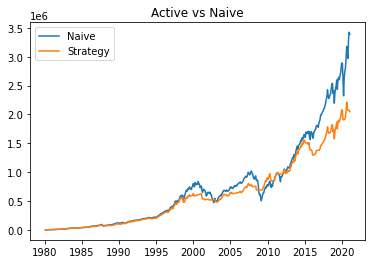

In [70]:

plt.plot(df1['Naive'],label = 'Naive')
plt.plot(df1['Strategy'],label = 'Strategy')
plt.title('Active vs Naive')
plt.legend();

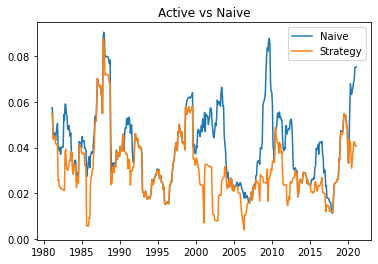

In [71]:
plt.plot(df1['Naive std'],label = 'Naive')
plt.plot(df1['Strategy std'],label = 'Strategy')
plt.title('Active vs Naive')
plt.legend();

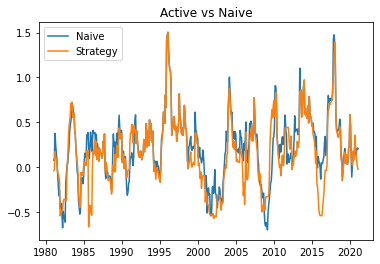

In [72]:
plt.plot(df1['Naive sharpe'],label = 'Naive')
plt.plot(df1['Strategy sharpe'],label = 'Strategy')
plt.title('Active vs Naive')
plt.legend();

In [73]:
df1.nlargest(5,['return'])

,Adj Close,RF,pos,return,Naive,investment,New Return,Strategy,Naive std,Strategy std,Naive Excess Return,Strategy Excess Return,Naive sharpe,Strategy sharpe
1987-01-31,13.488007,0.0042,1.0,0.132674,7.416404e+04,500,0.132674,6.728366e+04,0.070312,0.070312,0.128474,0.128474,0.212943,0.212943
2020-04-30,265.765289,0.0000,0.0,0.128138,2.621128e+06,500,0.000000,1.909811e+06,0.068078,0.041778,0.128138,0.000000,0.019199,0.025450
1982-08-31,6.239900,0.0076,0.0,0.124268,1.650290e+04,500,0.007600,1.729531e+04,0.054410,0.021457,0.116668,0.000000,-0.168158,-0.362175
1991-12-31,22.837591,0.0038,1.0,0.112472,1.675130e+05,500,0.112472,1.585993e+05,0.045199,0.045199,0.108672,0.108672,0.405267,0.405267
1984-08-31,8.942993,0.0083,1.0,0.111968,3.706876e+04,500,0.111968,3.924311e+04,0.042642,0.041008,0.103668,0.103668,-0.117910,-0.056807


In [74]:
df1.nlargest(5,['New Return'])

,Adj Close,RF,pos,return,Naive,investment,New Return,Strategy,Naive std,Strategy std,Naive Excess Return,Strategy Excess Return,Naive sharpe,Strategy sharpe
1987-01-31,13.488007,0.0042,1.0,0.132674,74164.038020,500,0.132674,67283.664621,0.070312,0.070312,0.128474,0.128474,0.212943,0.212943
1991-12-31,22.837591,0.0038,1.0,0.112472,167512.968685,500,0.112472,158599.302885,0.045199,0.045199,0.108672,0.108672,0.405267,0.405267
1984-08-31,8.942993,0.0083,1.0,0.111968,37068.759957,500,0.111968,39243.108560,0.042642,0.041008,0.103668,0.103668,-0.117910,-0.056807
1982-10-31,7.004606,0.0059,1.0,0.111328,19642.286662,500,0.111328,20432.949075,0.059096,0.038213,0.105428,0.105428,0.032631,0.026553
1980-11-30,7.137934,0.0096,1.0,0.109645,6880.011571,500,0.109645,6657.847064,NaN,NaN,0.100045,0.100045,NaN,NaN


In [75]:
df1.nsmallest(5,['return'])

,Adj Close,RF,pos,return,Naive,investment,New Return,Strategy,Naive std,Strategy std,Naive Excess Return,Strategy Excess Return,Naive sharpe,Strategy sharpe
1987-10-31,12.625879,0.0060,1.0,-0.217270,7.324679e+04,500,-0.217270,6.680619e+04,0.087745,0.087745,-0.223270,-0.223270,-0.027629,-0.027629
2008-10-31,70.275154,0.0008,0.0,-0.167924,6.558984e+05,500,0.000800,6.926378e+05,0.058683,0.026352,-0.168724,0.000000,-0.626651,-0.477209
1998-08-31,59.789520,0.0043,1.0,-0.144736,5.122040e+05,500,-0.144736,4.786662e+05,0.057669,0.057669,-0.149036,-0.149036,0.055960,0.055960
2020-03-31,235.578613,0.0012,0.0,-0.124013,2.322910e+06,500,0.001200,1.909311e+06,0.057232,0.043165,-0.125213,0.000000,-0.107956,0.098594
2002-09-30,53.161549,0.0014,0.0,-0.108880,4.721398e+05,500,0.001400,5.255477e+05,0.053303,0.007855,-0.110280,0.000000,-0.358905,-0.313409


In [76]:
df1.nsmallest(5,['New Return'])

,Adj Close,RF,pos,return,Naive,investment,New Return,Strategy,Naive std,Strategy std,Naive Excess Return,Strategy Excess Return,Naive sharpe,Strategy sharpe
1987-10-31,12.625879,0.0060,1.0,-0.217270,73246.785825,500,-0.217270,66806.192933,0.087745,0.087745,-0.223270,-0.223270,-0.027629,-0.027629
1998-08-31,59.789520,0.0043,1.0,-0.144736,512203.998555,500,-0.144736,478666.215375,0.057669,0.057669,-0.149036,-0.149036,0.055960,0.055960
1986-12-31,11.908108,0.0049,1.0,-0.098788,64976.936249,500,-0.098788,58902.485849,0.060692,0.060692,-0.103688,-0.103688,0.068575,0.068575
1980-03-31,5.026296,0.0121,1.0,-0.097906,1356.630898,500,-0.097906,1356.630898,NaN,NaN,-0.110006,-0.110006,NaN,NaN
2001-02-28,79.174469,0.0038,1.0,-0.091377,692621.788005,500,-0.091377,570225.066950,0.055422,0.027806,-0.095177,-0.095177,-0.189254,-0.285239
